Chapter 5:

In [11]:
# Cell 1: Imports y recursos NLTK
import nltk
from nltk import word_tokenize, FreqDist
# Descargar recursos necesarios
nltk.download('punkt')                      # Tokenizador
nltk.download('averaged_perceptron_tagger')
nltk.download('averaged_perceptron_tagger_eng')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hugom\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\hugom\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     C:\Users\hugom\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger_eng.zip.


True

In [12]:
# Cell 2: Cargar y etiquetar

from nltk.corpus import PlaintextCorpusReader

# Usar raw string para evitar problemas de escape
corpus = PlaintextCorpusReader('corpus_by_label', r'.*\.txt')

total_sents = []
tagged_sents = []
for fid in corpus.fileids():
    for line in corpus.raw(fid).splitlines():
        if line.strip():
            tokens = word_tokenize(line)
            total_sents.append(tokens)
            tagged_sents.append(nltk.pos_tag(tokens))
print(f"Total oraciones: {len(total_sents)}")

Total oraciones: 35098


In [13]:
# Cell 3: Etiquetado automático
tagged_sents = [nltk.pos_tag(sent) for sent in total_sents]

for sent in tagged_sents[:5]:
    print(sent)

[('You', 'PRP'), ('are', 'VBP'), ('gay', 'JJ'), ('or', 'CC'), ('antisemmitian', 'JJ'), ('?', '.'), ('Archangel', 'NNP'), ('WHite', 'NNP'), ('Tiger', 'NNP'), ('Meow', 'NNP'), ('!', '.'), ('Greetingshhh', 'NNP'), ('!', '.'), ('Uh', 'NNP'), (',', ','), ('there', 'EX'), ('are', 'VBP'), ('two', 'CD'), ('ways', 'NNS'), (',', ','), ('why', 'WRB'), ('you', 'PRP'), ('do', 'VBP'), ('erased', 'VBN'), ('my', 'PRP$'), ('comment', 'NN'), ('about', 'IN'), ('WW2', 'NNP'), (',', ','), ('that', 'IN'), ('holocaust', 'NN'), ('was', 'VBD'), ('brutally', 'RB'), ('slaying', 'VBG'), ('of', 'IN'), ('Jews', 'NNP'), ('and', 'CC'), ('not', 'RB'), ('gays/Gypsys/Slavs/anyone', 'VB'), ('...', ':'), ('1', 'CD'), ('-', ':'), ('If', 'IN'), ('you', 'PRP'), ('are', 'VBP'), ('anti-semitian', 'JJ'), (',', ','), ('than', 'IN'), ('shave', 'VB'), ('your', 'PRP$'), ('head', 'NN'), ('bald', 'NN'), ('and', 'CC'), ('go', 'VB'), ('to', 'TO'), ('the', 'DT'), ('skinhead', 'JJ'), ('meetings', 'NNS'), ('!', '.'), ('2', 'CD'), ('-', ':

In [14]:
# Cell 4: Análisis de frecuencias de etiquetas
from nltk import FreqDist

all_tags = [tag for sent in tagged_sents for (_, tag) in sent]
fd = FreqDist(all_tags)

print("Top 15 etiquetas en tu corpus:", fd.most_common(15))

Top 15 etiquetas en tu corpus: [('NNP', 410863), ('NN', 252439), ('.', 245997), ('PRP', 162664), ('IN', 125392), ('JJ', 124416), ('DT', 119706), ('VBP', 106965), ('VB', 81394), ('RB', 79637), (',', 62598), ('NNS', 55904), ('VBZ', 50244), ('CC', 41986), ('PRP$', 36157)]


In [15]:
# Cell 5: Guardar el corpus etiquetado en archivos por etiqueta original
import os
output_dir = 'tagged_corpus'
os.makedirs(output_dir, exist_ok=True)
offset = 0
for fid in label_files:
    comments = [c for c in corpus.raw(fid).splitlines() if c.strip()]
    n = len(comments)
    with open(os.path.join(output_dir, fid.replace('.txt', '_tagged.txt')), 'w', encoding='utf-8') as f:
        for sent in tagged_sents[offset:offset+n]:
            f.write(' '.join(f"{w}/{t}" for w, t in sent) + '\n')
    offset += n
print(f"Corpus etiquetado guardado en: {output_dir}")

Corpus etiquetado guardado en: tagged_corpus


In [16]:
# Cell 6: Performance del Lookup Tagger con tu corpus
from nltk import FreqDist, ConditionalFreqDist
import matplotlib.pyplot as plt

# Preparar datos para modelo lookup
tokens = [w for sent in total_sents for w in sent]
fdist = FreqDist(tokens)
# Obtener lista de palabras ordenadas por frecuencia
words_by_freq = [w for w, _ in fdist.most_common()]
# Construir CDF de palabra vs etiqueta del gold standard
cfd = ConditionalFreqDist((w, t) for sent in tagged_sents for (w, t) in sent)

In [17]:
# Función de rendimiento
from nltk import UnigramTagger, DefaultTagger
def performance(wordlist):
    model = {w: cfd[w].max() for w in wordlist}
    tagger = UnigramTagger(model=model, backoff=DefaultTagger('NN'))
    # Evaluar contra gold standard usando tagged_sents
    correct = total = 0
    for sent, gold in zip(total_sents, tagged_sents):
        tagged = tagger.tag(sent)
        for (_, g_tag), (_, t_tag) in zip(gold, tagged):
            total += 1
            if g_tag == t_tag:
                correct += 1
    return correct / total

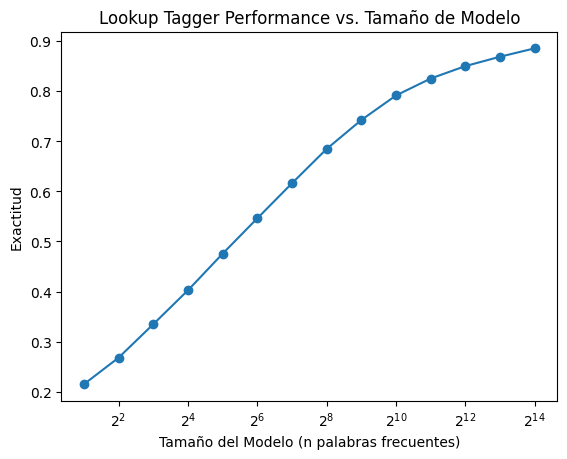

In [18]:
# Calcular rendimientos para distintos tamaños de modelo
sizes = [2**i for i in range(1, 15)]
perfs = [performance(words_by_freq[:s]) for s in sizes]

# Graficar
plt.plot(sizes, perfs, '-o')
plt.xscale('log', base=2)
plt.title('Lookup Tagger Performance vs. Tamaño de Modelo')
plt.xlabel('Tamaño del Modelo (n palabras frecuentes)')
plt.ylabel('Exactitud')
plt.show()

Training and Testing Data

In [20]:
# Cell 2: Cargar y etiquetar
corpus = PlaintextCorpusReader('corpus_by_label', r'.*\.txt')

# Tokenizar y taggear con pos_tag
total_sents = []
tagged_sents = []
for fid in corpus.fileids():
    for line in corpus.raw(fid).splitlines():
        if line.strip():
            tokens = word_tokenize(line)
            total_sents.append(tokens)
            tagged_sents.append(nltk.pos_tag(tokens))
print(f"Total oraciones: {len(total_sents)}")

Total oraciones: 35098


In [21]:
# Cell 3: Separar entrenamiento y prueba (90/10)
size = int(len(tagged_sents) * 0.9)
train_sents = tagged_sents[:size]
test_sents = tagged_sents[size:]
print(f"Train: {len(train_sents)} sentences, Test: {len(test_sents)} sentences")

Train: 31588 sentences, Test: 3510 sentences


In [22]:
# Cell 4: Entrenar Unigram, Bigram y Trigram Taggers con backoff
tag0 = nltk.DefaultTagger('NN')
tag1 = nltk.UnigramTagger(train_sents, backoff=tag0)
tag2 = nltk.BigramTagger(train_sents, backoff=tag1)
tag3 = nltk.TrigramTagger(train_sents, backoff=tag2)

# Evaluar cada tagger
print("Unigram accuracy:", tag1.evaluate(test_sents))
print("Bigram accuracy:", tag2.evaluate(test_sents))
print("Trigram accuracy:", tag3.evaluate(test_sents))

C:\Users\hugom\AppData\Local\Temp\ipykernel_20660\4052552101.py:8: DeprecationWarning: 
  Function evaluate() has been deprecated.  Use accuracy(gold)
  instead.
  print("Unigram accuracy:", tag1.evaluate(test_sents))
C:\Users\hugom\AppData\Local\Temp\ipykernel_20660\4052552101.py:9: DeprecationWarning: 
  Function evaluate() has been deprecated.  Use accuracy(gold)
  instead.
  print("Bigram accuracy:", tag2.evaluate(test_sents))


Unigram accuracy: 0.8860075249905381
Bigram accuracy: 0.93100162521985


C:\Users\hugom\AppData\Local\Temp\ipykernel_20660\4052552101.py:10: DeprecationWarning: 
  Function evaluate() has been deprecated.  Use accuracy(gold)
  instead.
  print("Trigram accuracy:", tag3.evaluate(test_sents))


Trigram accuracy: 0.9386601954716477


In [23]:
# Cell 5: Demostración de etiquetado para nuevas oraciones de tu corpus
# Mostrar 5 ejemplos del conjunto de prueba
demo_sents = total_sents[size:size+5]
for sent in demo_sents:
    print("Input:", sent)
    print("Tagged:", tag3.tag(sent))
    print()

Input: ['Listen', 'Cuntboy', 'You', "'re", 'just', 'a', 'fag', 'from', 'north', 'of', 'the', 'border', '.', 'Do', "n't", 'know', 'jack', 'about', 'the', 'NEvada', 'DOC', '.', 'I', 'fucked', 'your', 'wife', 'asshole']
Tagged: [('Listen', 'NNP'), ('Cuntboy', 'NNP'), ('You', 'PRP'), ("'re", 'VBP'), ('just', 'RB'), ('a', 'DT'), ('fag', 'NN'), ('from', 'IN'), ('north', 'JJ'), ('of', 'IN'), ('the', 'DT'), ('border', 'NN'), ('.', '.'), ('Do', 'VBP'), ("n't", 'RB'), ('know', 'VB'), ('jack', 'NN'), ('about', 'IN'), ('the', 'DT'), ('NEvada', 'NNP'), ('DOC', 'NNP'), ('.', '.'), ('I', 'PRP'), ('fucked', 'VBD'), ('your', 'PRP$'), ('wife', 'NN'), ('asshole', 'NN')]

Input: ['You', 'are', 'a', 'dumb', 'flower', 'Now', ',', 'normally', ',', 'I', 'do', 'not', 'use', 'that', 'term', 'explicitly', '.', 'I', 'just', 'quietly', 'think', 'it', '.', 'But', 'in', 'this', 'case', ',', 'there', 'is', 'evidence', '.', 'You', 'have', 'no', 'ISBN', "'s", 'to', 'your', 'name', '.', 'In', 'my', 'book', ',', 'that', 

In [26]:
# Cell 6: Matriz de confusión para evaluar errores
from nltk import ConfusionMatrix
# Recolectar predicciones y gold tags
test_gold = [tag for sent in test_sents for (_, tag) in sent]
test_pred = [tag for sent in [tag3.tag(sent) for sent in total_sents[size:]] for (_, tag) in sent]
print(nltk.ConfusionMatrix(test_gold, test_pred))

     |                                                                                                                             N                             P                                                                                                             |
     |                                                                                               J     J                 N     N     N     P     P     P     R           R     R           S                       V     V     V     V     V     W           W     W       |
     |                 '                                   C     C     D     E     F     I     J     J     J     M     N     N     P     N     D     O     R     P     R     B     B     R     Y     T     U     V     B     B     B     B     B     D     W     P     R     ` |
     |     #     $     '     (     )     ,     .     :     C     D     T     X     W     N     J     R     S     D     N     P     S     S     T     S     P     $     B     R     S 

In [27]:
# Cell 7: Guardar el mejor tagger entrenado
import pickle
with open('trigram_tagger.pkl', 'wb') as f:
    pickle.dump(tag3, f)
print("Trigram tagger guardado en 'trigram_tagger.pkl'")

Trigram tagger guardado en 'trigram_tagger.pkl'
